In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import string
import nltk

In [111]:
Dfake = pd.read_csv('Fake.csv')
Dtrue = pd.read_csv('True.csv')

In [112]:
Dfake.shape, Dtrue.shape

((23481, 4), (21417, 4))

In [113]:
Dfake['Class'] = 'fakeData'
Dtrue['Class'] = 'trueData'

In [114]:
dataset_1 = pd.concat([Dfake,Dtrue]).reset_index(drop = True)
dataset_1.shape

(44898, 5)

In [115]:
dataset_1.head(15)

,title,text,subject,date,Class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fakeData
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fakeData
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fakeData
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fakeData
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fakeData
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",fakeData
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",fakeData
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",fakeData
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",fakeData
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",fakeData


In [116]:
dataset_1.drop(['date'], axis = 1, inplace = True)
dataset_1.head()

,title,text,subject,Class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,fakeData
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,fakeData
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,fakeData
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,fakeData
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,fakeData


In [117]:
dataset_1.drop(['title'], axis = 1, inplace = True)
dataset_1.head()

,text,subject,Class
0,Donald Trump just couldn t wish all Americans ...,News,fakeData
1,House Intelligence Committee Chairman Devin Nu...,News,fakeData
2,"On Friday, it was revealed that former Milwauk...",News,fakeData
3,"On Christmas day, Donald Trump announced that ...",News,fakeData
4,Pope Francis used his annual Christmas Day mes...,News,fakeData


In [118]:
dataset_1.drop(['subject'], axis = 1, inplace = True)
dataset_1.head()

,text,Class
0,Donald Trump just couldn t wish all Americans ...,fakeData
1,House Intelligence Committee Chairman Devin Nu...,fakeData
2,"On Friday, it was revealed that former Milwauk...",fakeData
3,"On Christmas day, Donald Trump announced that ...",fakeData
4,Pope Francis used his annual Christmas Day mes...,fakeData


In [119]:
dataset_2 = pd.read_csv('train.csv')

In [120]:
dataset_2.shape

(20800, 5)

In [121]:
dataset_2.rename(columns = {'label':'Class'}, inplace = True)
dataset_2.head()

,id,title,author,text,Class
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [122]:
dataset_2['Class'] = dataset_2['Class'].replace([1 , 0], ['trueData', 'fakeData'])

In [123]:
dataset_2.head(15)

,id,title,author,text,Class
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,trueData
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,fakeData
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",trueData
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,trueData
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,trueData
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",fakeData
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,trueData
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",fakeData
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,fakeData
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,fakeData


In [124]:
dataset_2.drop(['id'], axis = 1, inplace = True)

In [125]:
dataset_2.drop(['title'], axis = 1, inplace = True)

In [126]:
dataset_2.drop(['author'], axis = 1, inplace = True)

In [127]:
dataset_2.head()

,text,Class
0,House Dem Aide: We Didn’t Even See Comey’s Let...,trueData
1,Ever get the feeling your life circles the rou...,fakeData
2,"Why the Truth Might Get You Fired October 29, ...",trueData
3,Videos 15 Civilians Killed In Single US Airstr...,trueData
4,Print \nAn Iranian woman has been sentenced to...,trueData


In [128]:
final_dataset = pd.concat([dataset_1,dataset_2]).reset_index(drop = True)
final_dataset.shape

(65698, 2)

In [129]:
from sklearn.utils import shuffle
final_dataset = shuffle(final_dataset)
final_dataset = final_dataset.reset_index(drop = True)

In [130]:
final_dataset['text'] = final_dataset['text'].str.lower()

In [131]:
final_dataset.head(10)

,text,Class
0,"\nin today’s, 25th, wikileaks release of hacke...",trueData
1,dallas — the women’s final four is a showca...,fakeData
2,the california state assembly passed a bill mo...,fakeData
3,out of america \ngood bye,trueData
4,washington (reuters) - the u.s. senate confirm...,trueData
5,new york (reuters) - donald trump appeared to ...,trueData
6,"billy bush, a host on the “today” show who has...",fakeData
7,wayne madsen | 11.11.2016 | world the clintons...,trueData
8,\nthis election remains more heated than any o...,trueData
9,washington (reuters) - u.s. senate republican ...,trueData


In [132]:
final_dataset['text'] = final_dataset['text'].astype(str)

In [133]:
def delete_punctuation(text):
    total_data = [char for char in text if char not in string.punctuation]
    final_str = ''.join(total_data)
    return final_str

final_dataset['text'] = final_dataset['text'].apply(delete_punctuation)

In [134]:
final_dataset.head(10)

,text,Class
0,\nin today’s 25th wikileaks release of hacked ...,trueData
1,dallas — the women’s final four is a showca...,fakeData
2,the california state assembly passed a bill mo...,fakeData
3,out of america \ngood bye,trueData
4,washington reuters the us senate confirmed fo...,trueData
5,new york reuters donald trump appeared to cha...,trueData
6,billy bush a host on the “today” show who has ...,fakeData
7,wayne madsen 11112016 world the clintons and...,trueData
8,\nthis election remains more heated than any o...,trueData
9,washington reuters us senate republican leade...,trueData


In [135]:
nltk.download('stopwords')
from nltk.corpus import stopwords
swords = stopwords.words('english')
final_dataset['text']  = final_dataset['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (swords)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sobhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [136]:
final_dataset.head(15)

,text,Class
0,today’s 25th wikileaks release hacked podesta ...,trueData
1,dallas — women’s final four showcase search pr...,fakeData
2,california state assembly passed bill monday a...,fakeData
3,america good bye,trueData
4,washington reuters us senate confirmed former ...,trueData
5,new york reuters donald trump appeared change ...,trueData
6,billy bush host “today” show received stinging...,fakeData
7,wayne madsen 11112016 world clintons soros lau...,trueData
8,election remains heated modern history – many ...,trueData
9,washington reuters us senate republican leader...,trueData


Class
fakeData    33868
trueData    31830
Name: text, dtype: int64


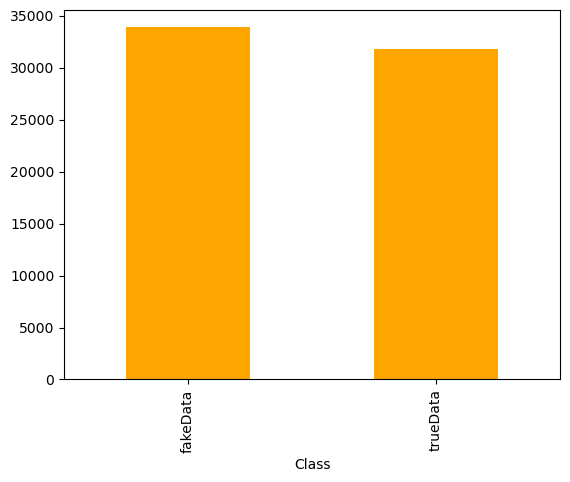

In [137]:
print(final_dataset.groupby(['Class'])['text'].count())
final_dataset.groupby(['Class'])['text'].count().plot(kind = 'bar', color = 'orange')
plt.show()

In [182]:
x_train, x_test, y_train, y_test = train_test_split(final_dataset['text'], final_dataset.Class, test_size = 0.3, random_state = 42)

In [139]:
#Logistic_Regression Algo
dt = dict()
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('Cvect', CountVectorizer()), ('Tfidf', TfidfTransformer()), ('Model', LogisticRegression())])

Model = pipe.fit(x_train, y_train)
Pred = Model.predict(x_test)

print("Accuracy of Logistic Regression Algo: {}%".format(round(accuracy_score(Pred, y_test)*100, 2)))

dt['Logistic Regression'] = round(accuracy_score(y_test, Pred)*100, 2)

Accuracy of Logistic Regression Algo: 93.2%


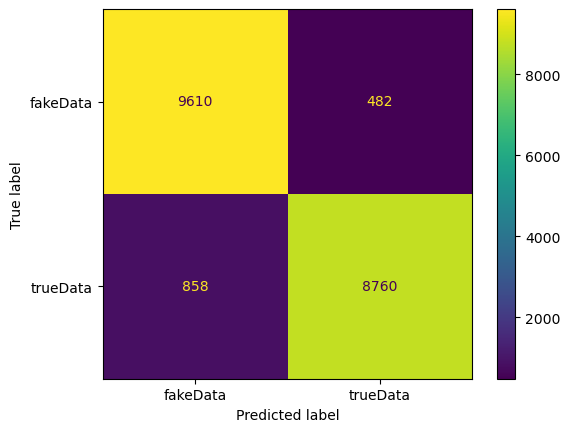

In [140]:
cm = confusion_matrix(y_test, Pred, labels = ['fakeData', 'trueData'])
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels= ['fakeData', 'trueData'])
disp.plot()
plt.show()

In [141]:
print(classification_report(y_test, Pred))

              precision    recall  f1-score   support

    fakeData       0.92      0.95      0.93     10092
    trueData       0.95      0.91      0.93      9618

    accuracy                           0.93     19710
   macro avg       0.93      0.93      0.93     19710
weighted avg       0.93      0.93      0.93     19710



In [183]:
#Decision_Tree
from sklearn.tree import DecisionTreeClassifier

pipe = Pipeline([('Cvect', CountVectorizer()), ('Tfidf', TfidfTransformer()), ('Model', DecisionTreeClassifier(criterion = 'entropy',max_depth = 20, splitter = 'best', random_state = 42))])

Model = pipe.fit(x_train, y_train)
Pred = Model.predict(x_test)

print("Accuracy of Decision Tree Algo: {}%".format(round(accuracy_score(Pred, y_test)*100, 2)))

dt['Decision Tree'] = round(accuracy_score(y_test, Pred)*100, 2)

Accuracy of Decision Tree Algo: 91.3%


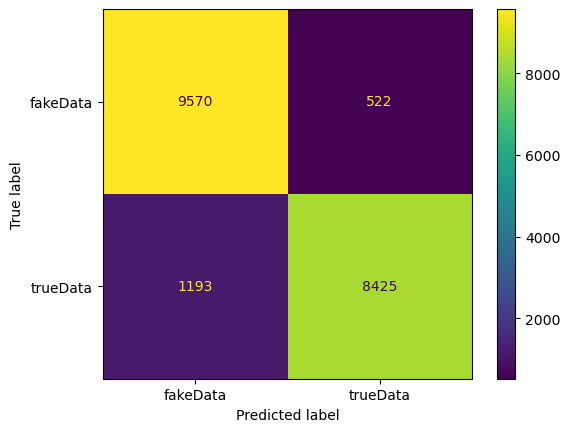

In [184]:
cm = confusion_matrix(y_test, Pred, labels = ['fakeData', 'trueData'])
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels= ['fakeData', 'trueData'])
disp.plot()
plt.show()

In [185]:
print(classification_report(y_test, Pred))

              precision    recall  f1-score   support

    fakeData       0.89      0.95      0.92     10092
    trueData       0.94      0.88      0.91      9618

    accuracy                           0.91     19710
   macro avg       0.92      0.91      0.91     19710
weighted avg       0.91      0.91      0.91     19710



In [144]:
#RandomForest

from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('Cvect', CountVectorizer()), ('Tfidf', TfidfTransformer()), ('Model', RandomForestClassifier(n_estimators = 50, criterion = 'entropy'))])

Model = pipe.fit(x_train, y_train)
Pred = Model.predict(x_test)

print("Accuracy of Random Forest Algo: {}%".format(round(accuracy_score(Pred, y_test)*100, 2)))

dt['Random Forest'] = round(accuracy_score(y_test, Pred)*100, 2)

Accuracy of Random Forest Algo: 88.91%


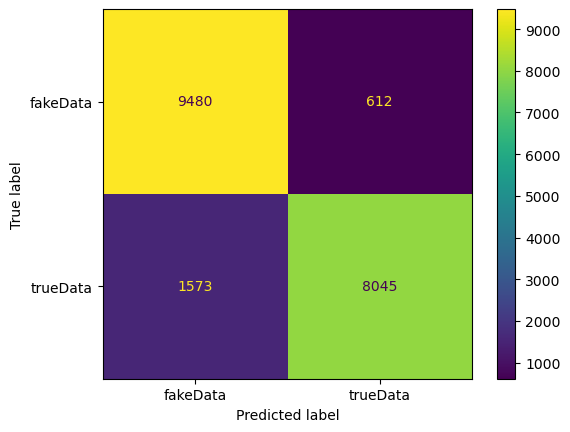

In [145]:
cm = confusion_matrix(y_test, Pred, labels = ['fakeData', 'trueData'])
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels= ['fakeData', 'trueData'])
disp.plot()
plt.show()

In [146]:
print(classification_report(y_test, Pred))

              precision    recall  f1-score   support

    fakeData       0.86      0.94      0.90     10092
    trueData       0.93      0.84      0.88      9618

    accuracy                           0.89     19710
   macro avg       0.89      0.89      0.89     19710
weighted avg       0.89      0.89      0.89     19710



In [147]:
#NaiveBayes
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
pipe = Pipeline([('Cvect', CountVectorizer()), ('Tfidf', TfidfTransformer()), ('Model', NB_classifier)])

Model = pipe.fit(x_train, y_train)
Pred = Model.predict(x_test)

print("Accuracy of Naive Bayes Algo: {}%".format(round(accuracy_score(Pred, y_test)*100, 2)))

dt['Naive Bayes'] = round(accuracy_score(y_test, Pred)*100, 2)

Accuracy of Naive Bayes Algo: 83.46%


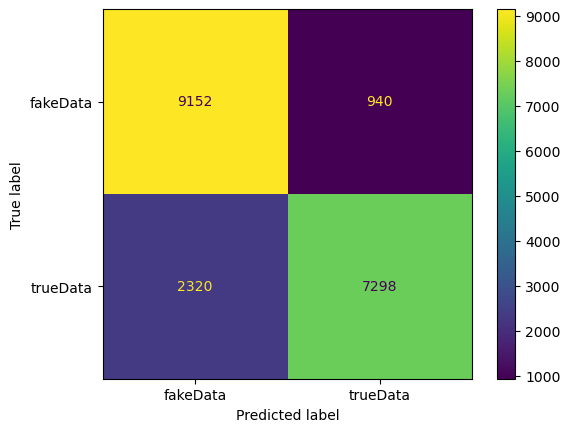

In [148]:
cm = confusion_matrix(y_test, Pred, labels = ['fakeData', 'trueData'])
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels= ['fakeData', 'trueData'])
disp.plot()
plt.show()

In [149]:
print(classification_report(y_test, Pred))

              precision    recall  f1-score   support

    fakeData       0.80      0.91      0.85     10092
    trueData       0.89      0.76      0.82      9618

    accuracy                           0.83     19710
   macro avg       0.84      0.83      0.83     19710
weighted avg       0.84      0.83      0.83     19710



In [150]:
#XGBoost
from xgboost import XGBClassifier

clf = XGBClassifier(random_state=42, seed=2, colsample_bytree=0.6, subsample=0.7)

pipe = Pipeline([('Cvect', CountVectorizer()), ('Tfidf', TfidfTransformer()), ('Model', clf)])

Model = pipe.fit(x_train, y_train)
Pred = Model.predict(x_test)

print("Accuracy of XGBoost Algo: {}%".format(round(accuracy_score(Pred, y_test)*100, 2)))


dt['XGBoost'] = round(accuracy_score(y_test, Pred)*100, 2)

C:\Users\sobhi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:58:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of XGBoost Algo: 95.63%


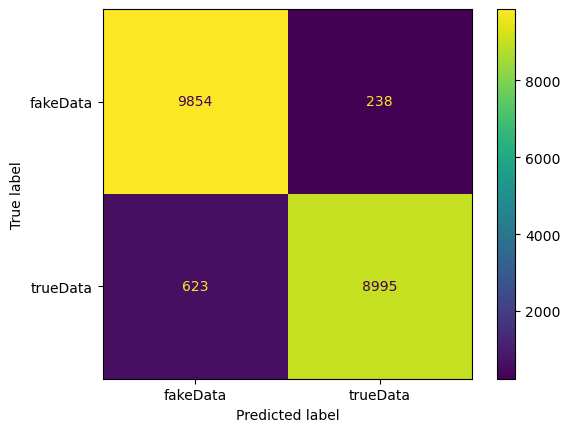

In [151]:
cm = confusion_matrix(y_test, Pred, labels = ['fakeData', 'trueData'])
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels= ['fakeData', 'trueData'])
disp.plot()
plt.show()

In [152]:
print(classification_report(y_test, Pred))

              precision    recall  f1-score   support

    fakeData       0.94      0.98      0.96     10092
    trueData       0.97      0.94      0.95      9618

    accuracy                           0.96     19710
   macro avg       0.96      0.96      0.96     19710
weighted avg       0.96      0.96      0.96     19710



In [153]:
#PassiveAggressiveClassifier

from sklearn.linear_model import PassiveAggressiveClassifier

clf = PassiveAggressiveClassifier(max_iter = 1000)

pipe = Pipeline([('Cvect', CountVectorizer()), ('Tfidf', TfidfTransformer()), ('Model', clf)])

Model = pipe.fit(x_train, y_train)
Pred = Model.predict(x_test)

print("Accuracy of PassiveAggressive Algo: {}%".format(round(accuracy_score(Pred, y_test)*100, 2)))

dt['PassiveAggressive'] = round(accuracy_score(y_test, Pred)*100, 2)

Accuracy of PassiveAggressive Algo: 95.39%


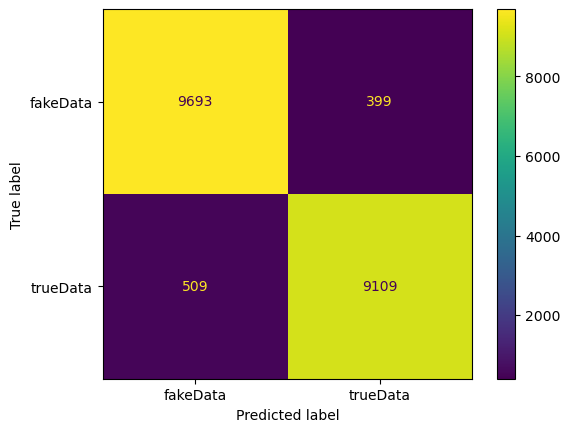

In [154]:
cm = confusion_matrix(y_test, Pred, labels = ['fakeData', 'trueData'])
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels= ['fakeData', 'trueData'])
disp.plot()
plt.show()

In [155]:
print(classification_report(y_test, Pred))

              precision    recall  f1-score   support

    fakeData       0.95      0.96      0.96     10092
    trueData       0.96      0.95      0.95      9618

    accuracy                           0.95     19710
   macro avg       0.95      0.95      0.95     19710
weighted avg       0.95      0.95      0.95     19710



([<matplotlib.axis.YTick at 0x21a85476370>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

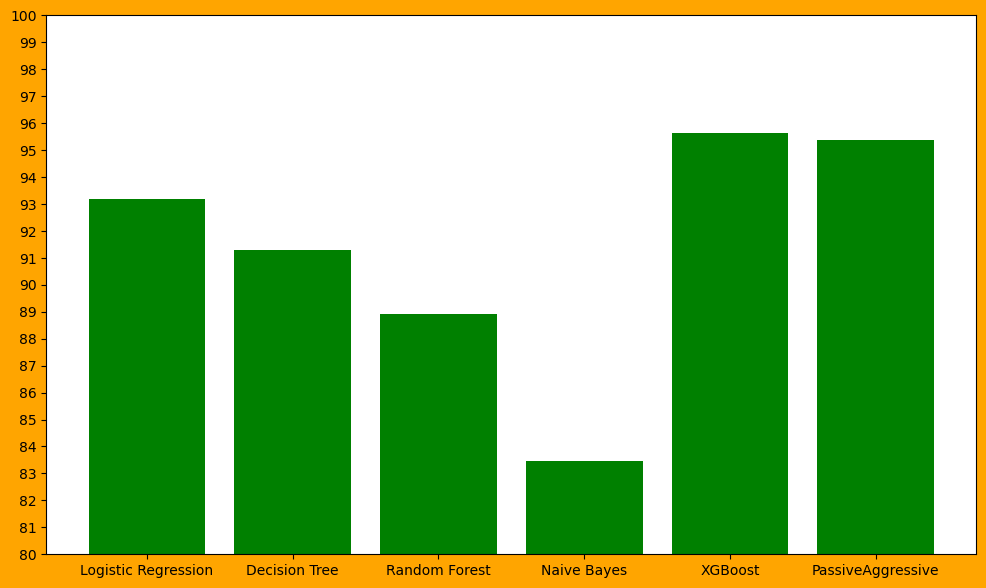

In [187]:
plt.figure(figsize=(12,7), facecolor = 'orange')
plt.bar(list(dt.keys()),list(dt.values()), color = 'green')
plt.ylim(80,100)
plt.yticks((80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100))

In [157]:
#Dataset1 - For Comparison

from sklearn.utils import shuffle
dataset_1 = shuffle(dataset_1)
dataset_1 = dataset_1.reset_index(drop = True)

In [158]:
dataset_1['text'] = dataset_1['text'].str.lower()

In [159]:
dataset_1['text'] = dataset_1['text'].astype(str)

In [160]:
def delete_punctuation(text):
    total_data = [char for char in text if char not in string.punctuation]
    final_str = ''.join(total_data)
    return final_str

dataset_1['text'] = dataset_1['text'].apply(delete_punctuation)

In [161]:
nltk.download('stopwords')
from nltk.corpus import stopwords
swords = stopwords.words('english')
dataset_1['text']  = dataset_1['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (swords)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sobhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [162]:
x_train, x_test, y_train, y_test = train_test_split(dataset_1['text'], dataset_1.Class, test_size = 0.3, random_state = 42)

In [163]:
#Logistic_Regression Algo

from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('Cvect', CountVectorizer()), ('Tfidf', TfidfTransformer()), ('Model', LogisticRegression())])

Model = pipe.fit(x_train, y_train)
Pred = Model.predict(x_test)

print("Accuracy of Logistic Regression Algo: {}%".format(round(accuracy_score(Pred, y_test)*100, 2)))

Accuracy of Logistic Regression Algo: 98.75%


In [164]:
#Decision_Tree
from sklearn.tree import DecisionTreeClassifier

pipe = Pipeline([('Cvect', CountVectorizer()), ('Tfidf', TfidfTransformer()), ('Model', DecisionTreeClassifier(criterion = 'entropy',max_depth = 20, splitter = 'best', random_state = 42))])

Model = pipe.fit(x_train, y_train)
Pred = Model.predict(x_test)

print("Accuracy of Decision Tree Algo: {}%".format(round(accuracy_score(Pred, y_test)*100, 2)))

Accuracy of Decision Tree Algo: 99.65%


In [165]:
#RandomForest

from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('Cvect', CountVectorizer()), ('Tfidf', TfidfTransformer()), ('Model', RandomForestClassifier(n_estimators = 50, criterion = 'entropy'))])

Model = pipe.fit(x_train, y_train)
Pred = Model.predict(x_test)

print("Accuracy of Random Forest Algo: {}%".format(round(accuracy_score(Pred, y_test)*100, 2)))

Accuracy of Random Forest Algo: 99.18%


In [166]:
#NaiveBayes
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
pipe = Pipeline([('Cvect', CountVectorizer()), ('Tfidf', TfidfTransformer()), ('Model', NB_classifier)])

Model = pipe.fit(x_train, y_train)
Pred = Model.predict(x_test)

print("Accuracy of Naive Bayes Algo: {}%".format(round(accuracy_score(Pred, y_test)*100, 2)))

Accuracy of Naive Bayes Algo: 94.95%


In [167]:
#XGBoost
from xgboost import XGBClassifier

clf = XGBClassifier(random_state=42, seed=2, colsample_bytree=0.6, subsample=0.7)

pipe = Pipeline([('Cvect', CountVectorizer()), ('Tfidf', TfidfTransformer()), ('Model', clf)])

Model = pipe.fit(x_train, y_train)
Pred = Model.predict(x_test)

print("Accuracy of XGBoost Algo: {}%".format(round(accuracy_score(Pred, y_test)*100, 2)))

C:\Users\sobhi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:01:04] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of XGBoost Algo: 99.73%


In [168]:
#PassiveAggressiveClassifier

from sklearn.linear_model import PassiveAggressiveClassifier

clf = PassiveAggressiveClassifier(max_iter = 1000)

pipe = Pipeline([('Cvect', CountVectorizer()), ('Tfidf', TfidfTransformer()), ('Model', clf)])

Model = pipe.fit(x_train, y_train)
Pred = Model.predict(x_test)

print("Accuracy of PassiveAggressive Algo: {}%".format(round(accuracy_score(Pred, y_test)*100, 2)))

Accuracy of PassiveAggressive Algo: 99.6%


In [188]:
#Dataset2 - For Comparison

from sklearn.utils import shuffle
dataset_2 = shuffle(dataset_2)
dataset_2 = dataset_1.reset_index(drop = True)

In [189]:
dataset_2['text'] = dataset_2['text'].str.lower()

In [190]:
dataset_2['text'] = dataset_2['text'].astype(str)

In [191]:
def delete_punctuation(text):
    total_data = [char for char in text if char not in string.punctuation]
    final_str = ''.join(total_data)
    return final_str

dataset_2['text'] = dataset_2['text'].apply(delete_punctuation)

In [192]:
nltk.download('stopwords')
from nltk.corpus import stopwords
swords = stopwords.words('english')
dataset_2['text']  = dataset_2['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (swords)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sobhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [193]:
x_train, x_test, y_train, y_test = train_test_split(dataset_2['text'], dataset_2.Class, test_size = 0.3, random_state = 42)

In [194]:
#Logistic_Regression Algo

from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('Cvect', CountVectorizer()), ('Tfidf', TfidfTransformer()), ('Model', LogisticRegression())])

Model = pipe.fit(x_train, y_train)
Pred = Model.predict(x_test)

print("Accuracy of Logistic Regression Algo: {}%".format(round(accuracy_score(Pred, y_test)*100, 2)))

Accuracy of Logistic Regression Algo: 98.75%


In [195]:
#Decision_Tree
from sklearn.tree import DecisionTreeClassifier

pipe = Pipeline([('Cvect', CountVectorizer()), ('Tfidf', TfidfTransformer()), ('Model', DecisionTreeClassifier(criterion = 'entropy',max_depth = 20, splitter = 'best', random_state = 42))])

Model = pipe.fit(x_train, y_train)
Pred = Model.predict(x_test)

print("Accuracy of Decision Tree Algo: {}%".format(round(accuracy_score(Pred, y_test)*100, 2)))

Accuracy of Decision Tree Algo: 99.65%


In [196]:
#RandomForest

from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('Cvect', CountVectorizer()), ('Tfidf', TfidfTransformer()), ('Model', RandomForestClassifier(n_estimators = 50, criterion = 'entropy'))])

Model = pipe.fit(x_train, y_train)
Pred = Model.predict(x_test)

print("Accuracy of Random Forest Algo: {}%".format(round(accuracy_score(Pred, y_test)*100, 2)))

Accuracy of Random Forest Algo: 98.92%


In [197]:
#NaiveBayes
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
pipe = Pipeline([('Cvect', CountVectorizer()), ('Tfidf', TfidfTransformer()), ('Model', NB_classifier)])

Model = pipe.fit(x_train, y_train)
Pred = Model.predict(x_test)

print("Accuracy of Naive Bayes Algo: {}%".format(round(accuracy_score(Pred, y_test)*100, 2)))

Accuracy of Naive Bayes Algo: 94.95%


In [198]:
#XGBoost
from xgboost import XGBClassifier

clf = XGBClassifier(random_state=42, seed=2, colsample_bytree=0.6, subsample=0.7)

pipe = Pipeline([('Cvect', CountVectorizer()), ('Tfidf', TfidfTransformer()), ('Model', clf)])

Model = pipe.fit(x_train, y_train)
Pred = Model.predict(x_test)

print("Accuracy of XGBoost Algo: {}%".format(round(accuracy_score(Pred, y_test)*100, 2)))

C:\Users\sobhi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:53:57] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of XGBoost Algo: 99.73%


In [199]:
#PassiveAggressiveClassifier

from sklearn.linear_model import PassiveAggressiveClassifier

clf = PassiveAggressiveClassifier(max_iter = 1000)

pipe = Pipeline([('Cvect', CountVectorizer()), ('Tfidf', TfidfTransformer()), ('Model', clf)])

Model = pipe.fit(x_train, y_train)
Pred = Model.predict(x_test)

print("Accuracy of PassiveAggressive Algo: {}%".format(round(accuracy_score(Pred, y_test)*100, 2)))

Accuracy of PassiveAggressive Algo: 99.61%
